#Lede Program
##Data and Databases
###Matthew L. Jones
###Number Munging 2

#Election Mining

> Campaigns are moving away from the meaningless labels of pollsters and newsweeklies — “Nascar dads” and “waitress moms” — and moving toward treating each voter as a separate person. In 2012 you didn’t just have to be an African-American from Akron or a suburban married female age 45 to 54. More and more, the information age allows people to be complicated, contradictory and unique. New technologies and an abundance of data may rattle the senses, but they are also bringing a fresh appreciation of the value of the individual to American politics.
    - Ethan Roeder, “I Am Not Big Brother” http://www.nytimes.com/2012/12/06/opinion/i-am-not-big-brother.html?_r=0.


In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We'll be using the MovieLens data set with 100K ratings from http://grouplens.org/datasets/movielens/. There you can find much bigger sets. You can download it at http://files.grouplens.org/datasets/movielens/ml-100k.zip. 

In the midst of writing this, I discovered a great blog post using `pandas` on the same data: http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/. The approach and tools are slightly different. Worth checking out!


In [3]:
!ls ~/Downloads/ml-100*

/Users/mljones/Downloads/ml-100k.zip


In [6]:
!unzip ~/Downloads/ml-100k

Archive:  /Users/mljones/Downloads/ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [15]:
!cd ml-100k
!ls ml-100k

README       u.genre      u.user       u2.test      u4.test      ua.test
allbut.pl    u.info       u1.base      u3.base      u5.base      ub.base
mku.sh       u.item       u1.test      u3.test      u5.test      ub.test
u.data       u.occupation u2.base      u4.base      ua.base


In [16]:
!cat ml-100k/README

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

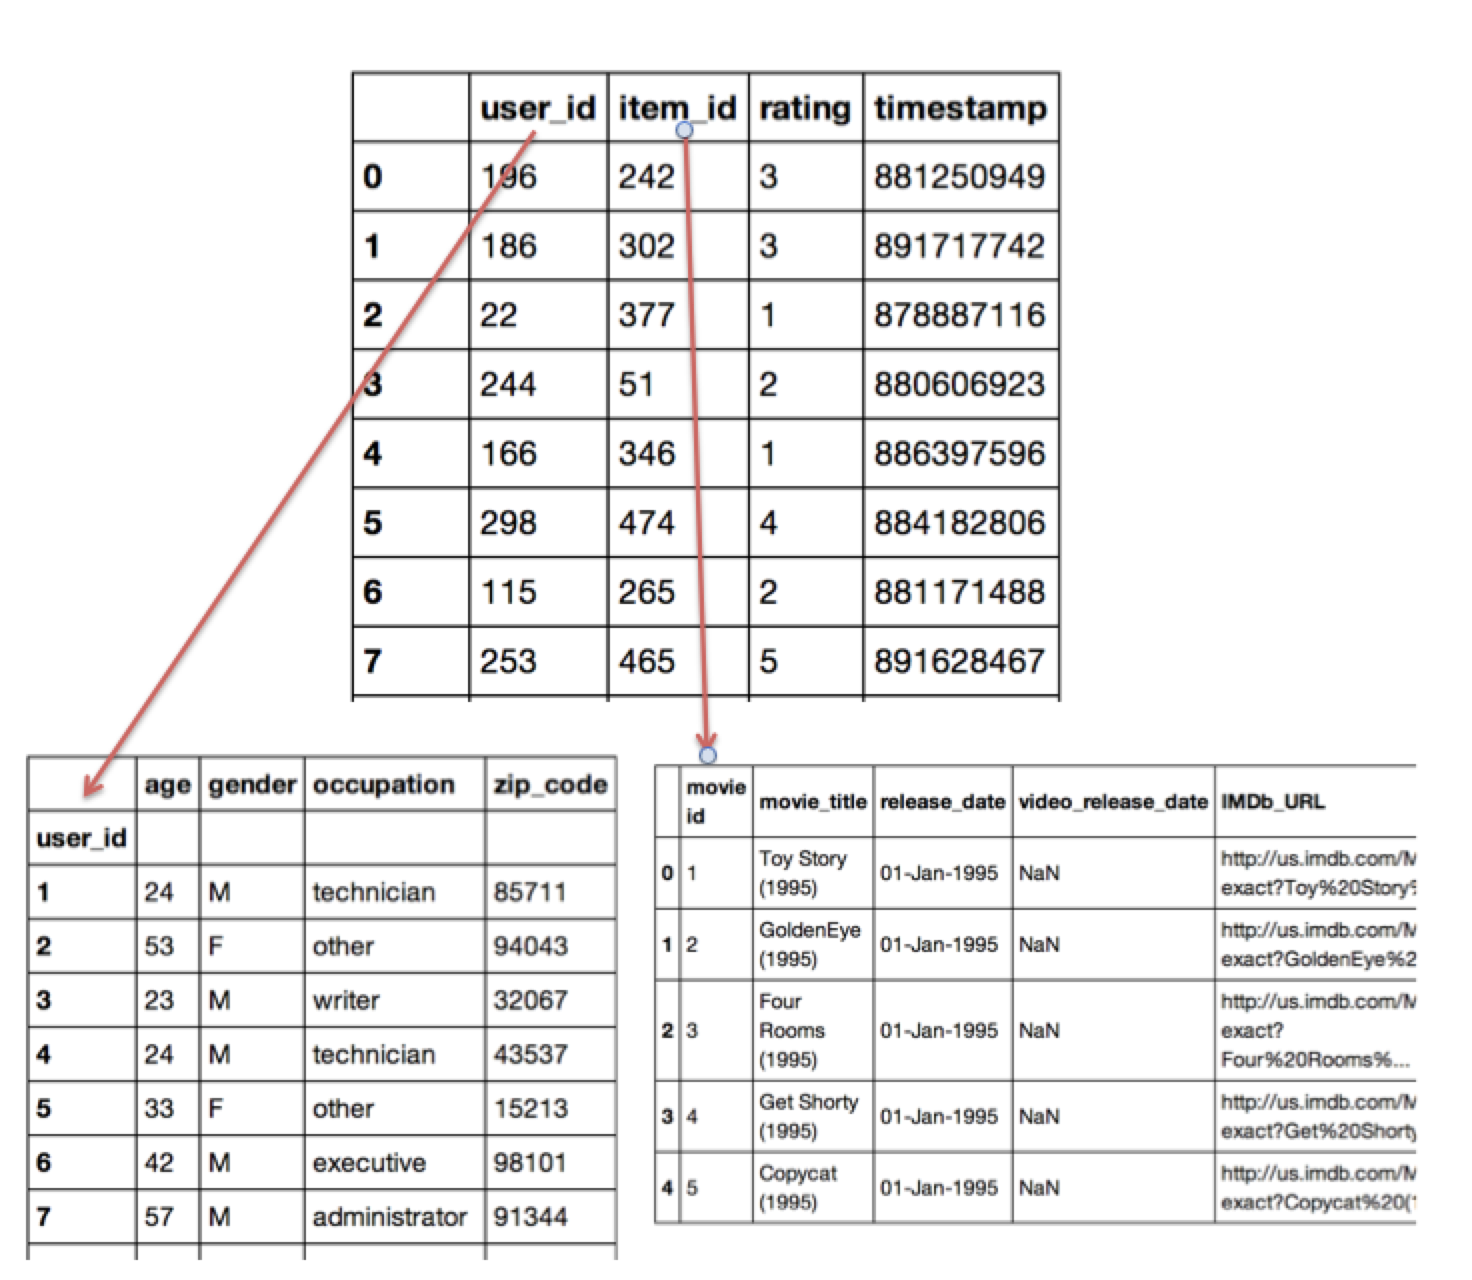

In [17]:
from IPython.display import Image
Image("http://imgur.com/ZhpRFTj.png")

In [64]:
films=pd.read_csv('./ml-100k/u.item', sep="|", names=["movie id", "movie_title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action","Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"], index_col="movie id")


labels_films=["movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action","Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
users=pd.read_csv('./ml-100k/u.user', sep="|", names=["user_id", "age", "gender","occupation","zip_code"], index_col="user_id")

In [8]:
individual_ratings=pd.read_csv('./ml-100k/u.data', sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

In [10]:
individual_ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [11]:
pd.to_datetime(individual_ratings["timestamp"], unit="s")

0       1997-12-04 15:55:49
1       1998-04-04 19:22:22
2       1997-11-07 07:18:36
3       1997-11-27 05:02:03
4       1998-02-02 05:33:16
5       1998-01-07 14:20:06
6       1997-12-03 17:51:28
7       1998-04-03 18:34:27
8       1998-02-01 09:20:17
9       1997-12-31 21:16:53
10      1997-11-12 22:07:14
11      1997-11-17 15:38:45
12      1997-10-05 09:05:40
13      1998-03-27 21:59:54
14      1998-02-21 23:40:57
15      1997-11-14 05:28:38
16      1997-11-11 17:47:39
17      1997-11-14 20:36:34
18      1997-09-21 09:42:24
19      1998-04-08 23:47:17
20      1998-01-30 16:13:34
21      1998-04-16 14:54:12
22      1997-10-26 15:55:20
23      1997-09-21 09:24:38
24      1998-02-17 17:28:52
25      1997-11-10 21:16:06
26      1998-04-13 01:14:54
27      1998-01-02 13:40:50
28      1997-10-01 23:10:01
29      1997-10-14 20:33:05
                ...        
99970   1997-11-19 17:12:53
99971   1997-10-05 07:38:41
99972   1997-10-18 01:17:27
99973   1997-09-20 22:01:29
99974   1997-10-07 1

In [12]:
individual_ratings["timestamp"]=pd.to_datetime(individual_ratings["timestamp"], unit="s")

In [13]:
individual_ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [15]:
users.ix[196]

age               49
gender             M
occupation    writer
zip_code       55105
Name: 196, dtype: object

In [16]:
films.ix[242]

movie id                                                            243
movie_title                                        Jungle2Jungle (1997)
release_date                                                07-Mar-1997
video_release_date                                                  NaN
IMDb_URL              http://us.imdb.com/M/title-exact?Jungle2Jungle...
unknown                                                               0
Action                                                                0
Adventure                                                             0
Animation                                                             0
Children's                                                            1
Comedy                                                                1
Crime                                                                 0
Documentary                                                           0
Drama                                                           

#What did user 42 rate?

In [17]:
user42=individual_ratings[individual_ratings["user_id"]==42]

In [18]:
user42

,user_id,item_id,rating,timestamp
58,42,423,5,1997-12-03 00:08:07
87,42,403,3,1997-12-03 00:24:44
111,42,96,5,1997-12-02 23:59:38
166,42,794,3,1997-12-03 00:20:25
310,42,546,3,1997-12-02 23:36:57
638,42,274,5,1997-12-02 23:36:57
659,42,588,5,1997-12-03 00:15:47
754,42,44,3,1997-12-03 00:22:28
778,42,1028,4,1997-12-02 23:41:12
871,42,625,3,1997-12-03 00:27:53


In [19]:
users.ix[42]

age                      30
gender                    M
occupation    administrator
zip_code              17870
Name: 42, dtype: object

In [20]:
user42["rating"].mean()

3.726775956284153

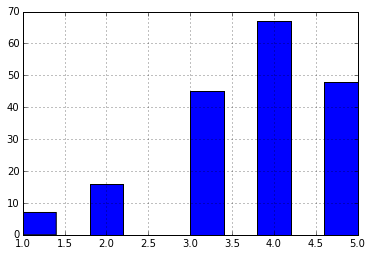

In [21]:
user42["rating"].hist()

In [22]:
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [23]:
users.groupby(by=["occupation", "gender"]).mean()

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [25]:
individual_ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


#PIVOT

In [26]:
ratings=individual_ratings.pivot(index="user_id", columns="item_id", values="rating")

In [27]:
ratings

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,NaN,NaN,NaN,NaN,NaN,2,4,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,5,NaN,NaN,5,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,5,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
ratings.mean(axis=0)

item_id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
6       3.576923
7       3.798469
8       3.995434
9       3.896321
10      3.831461
11      3.847458
12      4.385768
13      3.418478
14      3.967213
15      3.778157
16      3.205128
17      3.119565
18      2.800000
19      3.956522
20      3.416667
21      2.761905
22      4.151515
23      4.120879
24      3.448276
25      3.443686
26      3.452055
27      3.105263
28      3.931159
29      2.666667
30      3.945946
          ...   
1653    5.000000
1654    1.000000
1655    2.000000
1656    3.500000
1657    3.000000
1658    3.000000
1659    1.000000
1660    2.000000
1661    1.000000
1662    2.500000
1663    2.000000
1664    3.250000
1665    2.000000
1666    2.000000
1667    3.000000
1668    3.000000
1669    2.000000
1670    3.000000
1671    1.000000
1672    2.000000
1673    3.000000
1674    4.000000
1675    3.000000
1676    2.000000
1677    3.000000
1678    1.000000
1679    3.000000
1680  

In [29]:
ratings.mean(axis=1)

user_id
1      3.610294
2      3.709677
3      2.796296
4      4.333333
5      2.874286
6      3.635071
7      3.965261
8      3.796610
9      4.272727
10     4.206522
11     3.464088
12     4.392157
13     3.097484
14     4.091837
15     2.875000
16     4.328571
17     3.035714
18     3.880866
19     3.550000
20     3.104167
21     2.670391
22     3.351562
23     3.635762
24     4.323529
25     4.051282
26     2.943925
27     3.240000
28     3.721519
29     3.647059
30     3.767442
         ...   
914    3.086957
915    3.115385
916    3.365931
917    3.542857
918    3.349515
919    3.470046
920    3.230769
921    3.272727
922    3.370079
923    4.148649
924    3.756098
925    3.125000
926    3.300000
927    3.691667
928    4.687500
929    3.693878
930    2.968254
931    3.721311
932    3.966805
933    2.646739
934    3.701149
935    3.923077
936    3.746479
937    3.375000
938    3.268519
939    4.265306
940    3.457944
941    4.045455
942    4.265823
943    3.410714
dtype: float64

In [30]:
ratings.count(0)

item_id
1       452
2       131
3        90
4       209
5        86
6        26
7       392
8       219
9       299
10       89
11      236
12      267
13      184
14      183
15      293
16       39
17       92
18       10
19       69
20       72
21       84
22      297
23      182
24      174
25      293
26       73
27       57
28      276
29      114
30       37
       ... 
1653      1
1654      1
1655      1
1656      2
1657      1
1658      3
1659      1
1660      1
1661      1
1662      2
1663      1
1664      4
1665      1
1666      1
1667      1
1668      1
1669      1
1670      1
1671      1
1672      2
1673      1
1674      1
1675      1
1676      1
1677      1
1678      1
1679      1
1680      1
1681      1
1682      1
dtype: int64

In [31]:
ratings.count(1)

user_id
1      272
2       62
3       54
4       24
5      175
6      211
7      403
8       59
9       22
10     184
11     181
12      51
13     636
14      98
15     104
16     140
17      28
18     277
19      20
20      48
21     179
22     128
23     151
24      68
25      78
26     107
27      25
28      79
29      34
30      43
      ... 
914     23
915     26
916    317
917     35
918    103
919    217
920     26
921    110
922    127
923     74
924     82
925     32
926     20
927    120
928     32
929     49
930     63
931     61
932    241
933    184
934    174
935     39
936    142
937     40
938    108
939     49
940    107
941     22
942     79
943    168
dtype: int64

In [32]:
ratings.describe()

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
count,452.000000,131.000000,90.000000,209.000000,86.000000,26.000000,392.000000,219.000000,299.000000,89.000000,...,1,1,1,1,1,1,1,1,1,1
mean,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,3,4,3,2,3,1,3,2,3,3
std,0.927897,0.966497,1.212760,0.965069,0.946446,1.301478,0.982037,1.002281,1.042368,1.013948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3,4,3,2,3,1,3,2,3,3
25%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3,4,3,2,3,1,3,2,3,3
50%,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3,4,3,2,3,1,3,2,3,3
75%,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3,4,3,2,3,1,3,2,3,3
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3,4,3,2,3,1,3,2,3,3


the_non_crap    HINT: `use ratings.mean(axis=0)`

In [33]:
the_non_crap=ratings.mean(axis=0)>4

In [34]:
the_non_crap

item_id
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12       True
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22       True
23       True
24      False
25      False
26      False
27      False
28      False
29      False
30      False
        ...  
1653     True
1654    False
1655    False
1656    False
1657    False
1658    False
1659    False
1660    False
1661    False
1662    False
1663    False
1664    False
1665    False
1666    False
1667    False
1668    False
1669    False
1670    False
1671    False
1672    False
1673    False
1674    False
1675    False
1676    False
1677    False
1678    False
1679    False
1680    False
1681    False
1682    False
dtype: bool

In [35]:
ratings[the_non_crap]

/home/mljones/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,5,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,5,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,4,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,2,NaN,4,4,NaN,NaN,4,NaN,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,5,3,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
ratings.loc[:, the_non_crap]

item_id,12,22,23,45,48,50,56,59,60,64,...,1449,1467,1500,1524,1536,1594,1599,1639,1642,1653
user_id,,,,,,,,,,,,,,,,,,,,,
1,5,4,4,5,5,5,4,5,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,3,4,NaN,NaN,4,4,5,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,5,3,NaN,NaN,5,5,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,5,NaN,NaN,NaN,5,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#find the haters and the suckers

`<2                   >4`

In [37]:
haters=ratings.mean(axis=1)<2

In [38]:
haters

user_id
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
       ...  
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924    False
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
943    False
dtype: bool

In [39]:
suckers=ratings.mean(1)>4

In [40]:
suckers

user_id
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9       True
10      True
11     False
12      True
13     False
14      True
15     False
16      True
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24      True
25      True
26     False
27     False
28     False
29     False
30     False
       ...  
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923     True
924    False
925    False
926    False
927    False
928     True
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939     True
940    False
941     True
942     True
943    False
dtype: bool

In [42]:
users.ix[4]

age                   24
gender                 M
occupation    technician
zip_code           43537
Name: 4, dtype: object

In [47]:
users[suckers]

,age,gender,occupation,zip_code
user_id,,,,
4,24,M,technician,43537
9,29,M,student,01002
10,53,M,lawyer,90703
12,28,F,other,06405
14,45,M,scientist,55106
16,21,M,entertainment,10309
24,21,F,artist,94533
25,39,M,engineer,55107
34,38,F,administrator,42141


In [49]:
ratings.mean(0).order()

item_id
1364    1.000000
1561    1.000000
1559    1.000000
1557    1.000000
1601    1.000000
437     1.000000
1373    1.000000
1548    1.000000
1374    1.000000
1546    1.000000
439     1.000000
1618    1.000000
1621    1.000000
1363    1.000000
830     1.000000
1626    1.000000
1568    1.000000
852     1.000000
1562    1.000000
858     1.000000
1563    1.000000
1586    1.000000
1569    1.000000
1570    1.000000
1571    1.000000
1572    1.000000
1566    1.000000
1574    1.000000
1575    1.000000
1576    1.000000
          ...   
963     4.292683
134     4.292929
1191    4.333333
1639    4.333333
513     4.333333
178     4.344000
50      4.358491
12      4.385768
603     4.387560
64      4.445230
114     4.447761
483     4.456790
169     4.466102
318     4.466443
408     4.491071
1594    4.500000
1398    4.500000
119     4.500000
1642    4.500000
1449    4.625000
1536    5.000000
1500    5.000000
1189    5.000000
1201    5.000000
1599    5.000000
1122    5.000000
814     5.000000
1653  

In [50]:
ratings.mean(0).order(ascending=False)

item_id
1293    5.000000
1467    5.000000
1653    5.000000
814     5.000000
1122    5.000000
1599    5.000000
1201    5.000000
1189    5.000000
1500    5.000000
1536    5.000000
1449    4.625000
1642    4.500000
119     4.500000
1398    4.500000
1594    4.500000
408     4.491071
318     4.466443
169     4.466102
483     4.456790
114     4.447761
64      4.445230
603     4.387560
12      4.385768
50      4.358491
178     4.344000
513     4.333333
1639    4.333333
1191    4.333333
134     4.292929
963     4.292683
          ...   
1576    1.000000
1575    1.000000
1574    1.000000
1566    1.000000
1572    1.000000
1571    1.000000
1570    1.000000
1569    1.000000
1586    1.000000
1563    1.000000
858     1.000000
1562    1.000000
852     1.000000
1568    1.000000
1626    1.000000
830     1.000000
1363    1.000000
1621    1.000000
1618    1.000000
439     1.000000
1546    1.000000
1374    1.000000
1548    1.000000
1373    1.000000
437     1.000000
1601    1.000000
1557    1.000000
1559  

In [54]:
topten=ratings.mean(0).order(ascending=False)[0:9]

In [55]:
topten

item_id
1293    5
1467    5
1653    5
814     5
1122    5
1599    5
1201    5
1189    5
1500    5
dtype: float64

In [57]:
topten.index

Int64Index([1293, 1467, 1653, 814, 1122, 1599, 1201, 1189, 1500], dtype='int64', name=u'item_id')

In [59]:
films.ix[topten.index]

,movie id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item_id,,,,,,,,,,,,,,,,,,,,,
1293,1294,Ayn Rand: A Sense of Life (1997),13-Feb-1998,NaN,http://us.imdb.com/Title?Ayn+Rand%3A+A+Sense+o...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1467,1468,"Cure, The (1995)",01-Jan-1995,NaN,"http://us.imdb.com/M/title-exact?Cure,%20The%2...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1653,1654,Chairman of the Board (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Chairman+of+the+Board...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
814,815,One Fine Day (1996),30-Nov-1996,NaN,http://us.imdb.com/M/title-exact?One%20Fine%20...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1122,1123,"Last Time I Saw Paris, The (1954)",01-Jan-1954,NaN,http://us.imdb.com/M/title-exact?Last%20Time%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1599,1600,Guantanamera (1994),16-May-1997,NaN,http://us.imdb.com/M/title-exact?Guantanamera%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1201,1202,"Maybe, Maybe Not (Bewegte Mann, Der) (1994)",19-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Bewegte%20Man...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1189,1190,That Old Feeling (1997),04-Apr-1997,NaN,http://us.imdb.com/M/title-exact?That%20Old%20...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1500,1501,Prisoner of the Mountains (Kavkazsky Plennik) ...,31-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kavkazsky%20P...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
ratings

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,NaN,NaN,NaN,NaN,NaN,2,4,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,5,NaN,NaN,5,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,5,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Reindexing

You asked about reindexing the films so that it is correct


The method is indeed `.reindex(index="movie id")` 